In [1]:
from google.colab import drive
drive._mount('/content/drive')  

Mounted at /content/drive


In [2]:
from __future__ import print_function  
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data 
from torch.utils.data import Subset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau
from sklearn import metrics
from torch.nn import functional as F
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder


import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)





# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1./255)
       # rotation_range=40,
       # height_shift_range=0.2,
       # shear_range=0.2,
       # zoom_range=0.2,
       # horizontal_flip=True,
       # fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/",
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/",
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 480 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [6]:
print("label map for train: ",train_generator.class_indices)
print("")
print("----")
print("")
print("label map for val data: ",valid_generator.class_indices)

label map for train:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularaadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}

----

label map for val data:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}


In [8]:
print("Train classes: ",train_generator.classes)
print("")
print("Valid classes: ",valid_generator.classes)

Train classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

Valid cla

In [20]:
input_shape = (299, 299, 3)
base_model = tf.keras.applications.InceptionResNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape)
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_406 (Conv2D)            (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_406 (Batch  (None, 149, 149, 32  96         ['conv2d_406[0][0]']             
 Normalization)                 )                                               

In [21]:
for layer in base_model.layers:
    layer.trainable = False  #True

In [22]:
import tensorflow_hub as hub
inputs = tf.keras.layers.Input(shape=[299, 299, 3])


x = Dropout(0.1)(base_model.layers[-2].output)
x = Dense(8, activation='softmax', name='predictions')(x)
model = tf.keras.Model(base_model.inputs, x)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_406 (Conv2D)            (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_406 (Batch  (None, 149, 149, 32  96         ['conv2d_406[0][0]']             
 Normalization)                 )                                                           

In [24]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

epochs = 70
batch_size = 32
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    decay_steps =240, decay_rate = 0.7,
    initial_learning_rate=0.0002)


#opt = keras.optimizers.SGD(learning_rate = 0.001, momentum = 1)
opt = keras.optimizers.Adam(learning_rate = lr_schedule)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.9, epsilon=1e-07)

model.compile(optimizer=opt ,  #rmsprop #sgd
              loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(train_generator, shuffle = True, batch_size=batch_size,
          epochs=epochs, verbose=1,  validation_data = valid_generator)  #steps_per_epoch= 200, validation_steps= 200

Epoch 1/70
120/120 [==============================] - 282s 2s/step - loss: 1.9687 - accuracy: 0.2625 - val_loss: 2.0641 - val_accuracy: 0.2000
Epoch 2/70
120/120 [==============================] - 221s 2s/step - loss: 1.7756 - accuracy: 0.3750 - val_loss: 2.0403 - val_accuracy: 0.1750
Epoch 3/70
120/120 [==============================] - 220s 2s/step - loss: 1.6517 - accuracy: 0.4250 - val_loss: 2.0306 - val_accuracy: 0.1500
Epoch 4/70
120/120 [==============================] - 220s 2s/step - loss: 1.5460 - accuracy: 0.4979 - val_loss: 2.0307 - val_accuracy: 0.1750
Epoch 5/70
120/120 [==============================] - 220s 2s/step - loss: 1.4893 - accuracy: 0.5042 - val_loss: 2.0233 - val_accuracy: 0.2500
Epoch 6/70
120/120 [==============================] - 220s 2s/step - loss: 1.4352 - accuracy: 0.5562 - val_loss: 2.0203 - val_accuracy: 0.2000
Epoch 7/70
120/120 [==============================] - 229s 2s/step - loss: 1.3878 - accuracy: 0.5833 - val_loss: 2.0221 - val_accuracy: 0.2250

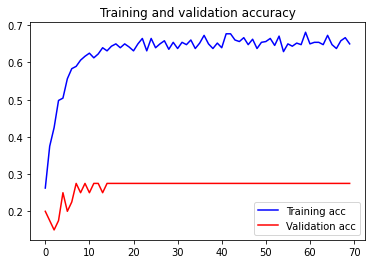

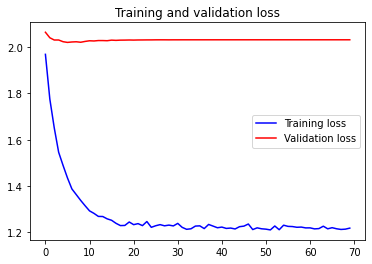

In [25]:
import matplotlib.pyplot as plt
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

In [26]:
model.save("/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/incresv2.h5" )

In [27]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/incresv2.h5')

In [28]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
test_generator = test_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/",
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",  #None
    shuffle=False,
    #seed=42
)
nBatches = 1

Found 1876 images belonging to 8 classes.


In [45]:
test_generator.reset()

In [46]:
y_true = test_generator.classes

In [47]:
print("Test images class lables: ",y_true)

Test images class lables:  [0 0 0 ... 7 7 7]


In [48]:
pred=model.predict_generator(generator=test_generator, steps=test_generator.samples//nBatches, max_queue_size=10,               
                                workers=1, use_multiprocessing=False, verbose=1)

1876/1876 [==============================] - 897s 478ms/step


In [49]:
y_pred = np.argmax(pred,axis=1)
print("Test images predicted labels: ", y_pred)

Test images predicted labels:  [0 0 0 ... 5 0 5]


In [50]:
score = model.evaluate_generator(generator=test_generator,               
                                     steps=test_generator.samples//nBatches, 
                                     max_queue_size=10,               
                                     workers=1,                        
                                     use_multiprocessing=False,        
                                     verbose=1)
print("Test loss: %.3f - Test acc: %.3f" % (score[0], score[1]))


1876/1876 [==============================] - 895s 477ms/step - loss: 1.8678 - accuracy: 0.2404
Test loss: 1.868 - Test acc: 0.240


In [51]:
print(y_true.shape)
print(y_pred.shape)

(1876,)
(1876,)


In [52]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 35   8  10  11  14   2  17   1]
 [ 19  76  20  83  15   7  15   3]
 [ 18  35  23  17   1   0   0   0]
 [  7  17   5  64  16   1  18   4]
 [ 50  67  23 172 118  71 284  72]
 [  3  10   4  16   9  51  45   2]
 [ 17  30   5  21  16  18  66  15]
 [ 30  15   7  24   6   7  22  18]]


In [53]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4','Class 5','Class 6','Class 7', 'Class 8']))


Accuracy: 0.24

Micro Precision: 0.24
Micro Recall: 0.24
Micro F1-score: 0.24

Macro Precision: 0.26
Macro Recall: 0.30
Macro F1-score: 0.24

Weighted Precision: 0.40
Weighted Recall: 0.24
Weighted F1-score: 0.24

Classification Report

              precision    recall  f1-score   support

     Class 1       0.20      0.36      0.25        98
     Class 2       0.29      0.32      0.31       238
     Class 3       0.24      0.24      0.24        94
     Class 4       0.16      0.48      0.24       132
     Class 5       0.61      0.14      0.22       857
     Class 6       0.32      0.36      0.34       140
     Class 7       0.14      0.35      0.20       188
     Class 8       0.16      0.14      0.15       129

    accuracy                           0.24      1876
   macro avg       0.26      0.30      0.24      1876
weighted avg       0.40      0.24      0.24      1876



Reference: [Deep Learning Based Analysis of Histopathological Images of Breast Cancer](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6390493//)